In [1]:
import os
os.chdir("../../")

In [2]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib

In [3]:
sns.set(style='whitegrid')

In [4]:
params = {
    "Mouse Brain":{ 
        "scNet v2": 535780,
        "scNet v1": 256960,
        "scNet": 640,
        "trVAE": 535780,
    },
    "Pancreas":{ 
        "scNet v2": 278940,
        "scNet v1": 129120,
        "scNet": 800,
        "trVAE": 278780,
    },
    "Tabula Senis":{ 
        "scNet v2": 4708046,
        "scNet v1": 2059040,
        "scNet": 10560,
        "trVAE": 4699598,
    },
    
}

In [5]:
df = pd.DataFrame(params)
df['model'] = df.index
df

,Mouse Brain,Pancreas,Tabula Senis,model
scNet,640,800,10560,scNet
scNet v1,256960,129120,2059040,scNet v1
scNet v2,535780,278940,4708046,scNet v2
trVAE,535780,278780,4699598,trVAE


In [6]:
data = pd.melt(df, id_vars=['model'], value_name='n_params', var_name='dataset')
data.head()

,model,dataset,n_params
0,scNet,Mouse Brain,640
1,scNet v1,Mouse Brain,256960
2,scNet v2,Mouse Brain,535780
3,trVAE,Mouse Brain,535780
4,scNet,Pancreas,800


In [7]:
import numpy as np

In [8]:
data['n_params'] = np.log(data['n_params'].values)

In [9]:
font = {'family' : 'Arial',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=40)
matplotlib.rc('xtick', labelsize=40)

<Figure size 864x720 with 0 Axes>

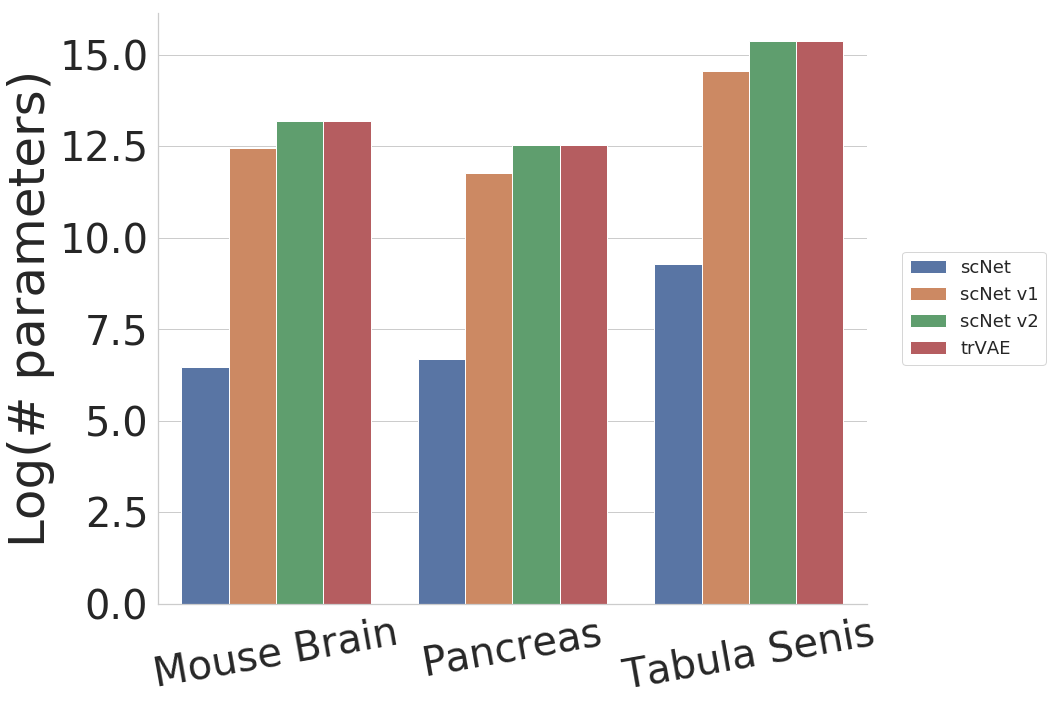

In [11]:
plt.close("all")
plt.figure(figsize=(12, 10))
g = sns.catplot(x="dataset", y="n_params", hue="model", kind="bar", 
                data=data, legend=False,
                height=10, aspect=1.5)
plt.xticks(rotation=10)
plt.xlabel('', fontsize=22)
plt.ylabel("Log(# parameters)", fontsize=50)
plt.legend(bbox_to_anchor=(1.05,0.5), borderaxespad=0, loc='center left', prop={'size': 18})
plt.tight_layout()
plt.savefig(f"./results/parameters.pdf", dpi=300)
plt.show()